# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from api_keys import api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

total_cities = len(cities)
print(total_cities)

#max is 1500 cities. printing first 10 to tie out first 10 in API calls
print(cities[:10])

620
['atuona', 'esperance', 'fuxin', 'tiksi', 'neryungri', 'bluff', 'kavaratti', 'baiyin', 'torres', 'hilo']


In [18]:
#testing links and viewing json layout

test_city = cities[0]

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key + "&q="
full_url = base_url + test_city
print(f"city: {test_city} \nlink: {full_url}\n")

from pprint import pprint 

test_weather = (requests.get(full_url)).json()
pprint(test_weather)

city: atuona 
link: http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=atuona

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.03},
 'dt': 1561396154,
 'id': 4020109,
 'main': {'grnd_level': 1014.92,
          'humidity': 76,
          'pressure': 1014.92,
          'sea_level': 1014.92,
          'temp': 81.64,
          'temp_max': 81.64,
          'temp_min': 81.64},
 'name': 'Atuona',
 'rain': {'3h': 1.375},
 'sys': {'country': 'PF',
         'message': 0.0065,
         'sunrise': 1561390317,
         'sunset': 1561431900},
 'timezone': -34200,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 88.285, 'speed': 14.58}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#counters
record = 1
skipped = 0

print(f"Ready, Set, Go")
print("-"*20)

for city in cities: 
    try: 
        response = requests.get(f"{base_url}{city}").json()
        
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        city_record = response["name"]
       
        print(f"Processing Record {record} : {city_record}")
        print(f"{base_url}{city}")

        record += 1

    except:
        print("City not found, skipping.")
        skipped += 1

    print("-"*20)

print(f"Ready, Set, Stop \nCities Found: {record - 1}\nCities Skipped: {skipped} \nTotal Cities: {total_cities}")
#total_cities is called rather than doing a (record + skipped) to ensure the counters work properly. 

Ready, Set, Go
--------------------
Processing Record 1 : Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=atuona
--------------------
Processing Record 2 : Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=esperance
--------------------
Processing Record 3 : Fuxin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=fuxin
--------------------
Processing Record 4 : Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=tiksi
--------------------
Processing Record 5 : Neryungri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=neryungri
--------------------
Processing Record 6 : Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=bluff
-------------------

Processing Record 50 : Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=punta arenas
--------------------
Processing Record 51 : Burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=burnie
--------------------
Processing Record 52 : Lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=lasa
--------------------
Processing Record 53 : Veydelevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=veydelevka
--------------------
Processing Record 54 : Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=mar del plata
--------------------
Processing Record 55 : Maine-Soroa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=maine-soroa
---------------

Processing Record 98 : Warrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=warrington
--------------------
Processing Record 99 : Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=sao joao da barra
--------------------
City not found, skipping.
--------------------
Processing Record 100 : Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=lompoc
--------------------
City not found, skipping.
--------------------
City not found, skipping.
--------------------
Processing Record 101 : Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=kodiak
--------------------
Processing Record 102 : Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=kaitangata
--------------------
Processing Re

Processing Record 146 : Herat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=herat
--------------------
Processing Record 147 : Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=norman wells
--------------------
Processing Record 148 : Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=saskylakh
--------------------
Processing Record 149 : Teguise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=teguise
--------------------
Processing Record 150 : Lensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=lensk
--------------------
Processing Record 151 : Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=butaritari
--------------------
Proc

Processing Record 194 : Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=marsa matruh
--------------------
Processing Record 195 : Nikolayevsk-na-amure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=nikolayevsk-na-amure
--------------------
Processing Record 196 : Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=hithadhoo
--------------------
Processing Record 197 : Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=valley
--------------------
Processing Record 198 : Puerto Baquerizo Moreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=puerto baquerizo moreno
--------------------
City not found, skipping.
--------------------
Processing Record 199 : Kudahuvadhoo
http://api.openweathermap.

Processing Record 242 : Paracuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=paracuru
--------------------
City not found, skipping.
--------------------
Processing Record 243 : Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=margate
--------------------
Processing Record 244 : Jiangkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=jiangkou
--------------------
Processing Record 245 : Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=wanning
--------------------
Processing Record 246 : Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=broome
--------------------
Processing Record 247 : Kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5

Processing Record 290 : Bato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=bato
--------------------
Processing Record 291 : Santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=santiago
--------------------
City not found, skipping.
--------------------
Processing Record 292 : Raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=raudeberg
--------------------
Processing Record 293 : Catio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=catio
--------------------
Processing Record 294 : Xuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=xuzhou
--------------------
Processing Record 295 : Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q

Processing Record 338 : Banjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=banjar
--------------------
Processing Record 339 : San Nicolas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=san nicolas
--------------------
Processing Record 340 : Ocampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=ocampo
--------------------
Processing Record 341 : Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=portland
--------------------
Processing Record 342 : Bhachau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=bhachau
--------------------
Processing Record 343 : Abashiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=abashiri
--------------------
Processi

Processing Record 387 : Kalga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=kalga
--------------------
Processing Record 388 : Bukachacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=bukachacha
--------------------
Processing Record 389 : Ocean Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=ocean springs
--------------------
Processing Record 390 : Uhlove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=uhlove
--------------------
Processing Record 391 : Moranbah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=moranbah
--------------------
Processing Record 392 : Roura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=roura
--------------------
Proces

Processing Record 435 : Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=vestmanna
--------------------
Processing Record 436 : Kresek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=kresek
--------------------
Processing Record 437 : Ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=ngunguru
--------------------
Processing Record 438 : Marquard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=marquard
--------------------
Processing Record 439 : Alibag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=alibag
--------------------
Processing Record 440 : Yichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=yichang
--------------------
Processing R

City not found, skipping.
--------------------
Processing Record 483 : Jalapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=jalapa
--------------------
Processing Record 484 : Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=ilulissat
--------------------
Processing Record 485 : Aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=aripuana
--------------------
City not found, skipping.
--------------------
City not found, skipping.
--------------------
Processing Record 486 : Kalianget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=kalianget
--------------------
City not found, skipping.
--------------------
Processing Record 487 : Agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=agadez
-------

Processing Record 530 : Mbeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=mbeya
--------------------
Processing Record 531 : Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=luanda
--------------------
City not found, skipping.
--------------------
Processing Record 532 : Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=bonavista
--------------------
City not found, skipping.
--------------------
Processing Record 533 : Kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=kodinsk
--------------------
Processing Record 534 : Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=65f39ecbd20f2ef6f3ffa372ec1af5bf&q=kirakira
--------------------
Processing Record 535 : Kantunilkin
http://api.openweathermap.org/data/2.5/weather?uni

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_dict = {"City" : city_name,
                "Cloudiness" : cloudiness, 
                "Country" : country,
                "Date" : date, 
                "Humidity" : humidity,
                "Lat" : lat, 
                "Lng" : lng, 
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file)

print(weather_df.count())
weather_df.head()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,2,PF,1561396154,76,-9.80,-139.03,81.64,14.58
1,Esperance,20,TT,1561396155,59,10.24,-61.45,89.60,19.46
2,Fuxin,79,CN,1561396270,69,42.02,121.65,68.50,15.52
3,Tiksi,0,RU,1561396271,63,71.64,128.87,50.32,3.60
4,Neryungri,25,RU,1561396271,93,56.66,124.71,43.84,2.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [21]:
#converting Date values in weather_df to a xx/xx/xxxx format 
epoch = weather_df['Date'][0]
epoch_conv = time.strftime("%m/%d/%Y", time.localtime(epoch))

epoch_conv

'06/24/2019'

#### Latitude vs. Temperature Plot

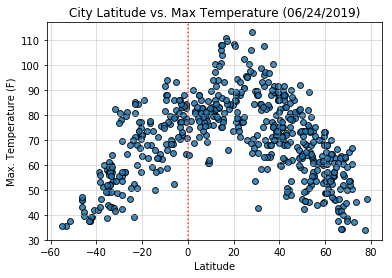

In [22]:
x_axis = weather_df["Lat"]

plt.scatter(x_axis, weather_df["Max Temp"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.85)

plt.title(f"City Latitude vs. Max Temperature ({epoch_conv})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.axvline(x = 0, c = "r", alpha = 0.75, ls = 'dotted')
plt.grid(alpha = 0.5)

plt.savefig("output_data/Lat_v_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

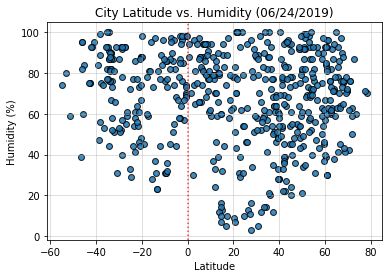

In [23]:
plt.scatter(x_axis, weather_df["Humidity"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.85)

plt.title(f"City Latitude vs. Humidity ({epoch_conv})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.axvline(x = 0, c = "r", alpha = 0.75, ls = 'dotted')
plt.grid(alpha = 0.5)

# plt.ylim(0, 120)

plt.savefig("output_data/Lat_v_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

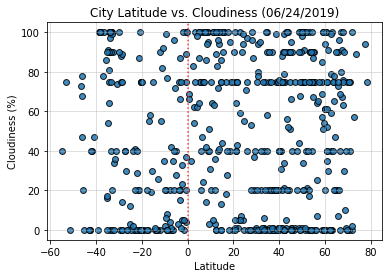

In [24]:
plt.scatter(x_axis, weather_df["Cloudiness"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.85)

plt.title(f"City Latitude vs. Cloudiness ({epoch_conv})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.axvline(x = 0, c = "r", alpha = 0.75, ls = 'dotted')
plt.grid(alpha = 0.5)

plt.savefig("output_data/Lat_v_Cloud.png")

plt.show()

#### Latitude vs. Wind Speed Plot

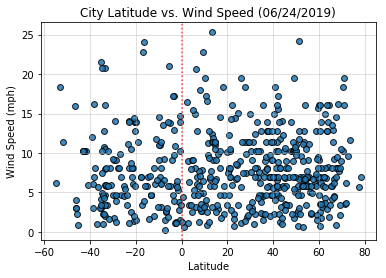

In [25]:
plt.scatter(x_axis, weather_df["Wind Speed"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.85)

plt.title(f"City Latitude vs. Wind Speed ({epoch_conv})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.axvline(x = 0, c = "r", alpha = 0.75, ls = 'dotted')
plt.grid(alpha = 0.5)

plt.savefig("output_data/Lat_v_wind.png")

plt.show()

#### 3 Observable Trends, data run at 10am (GMT -5)

* There is a discernible correlation between latitude and temperature. Temperatures are the most warm between 0 and +20 this time of year/day. Temperature drops farther away from the equator on both sides of the equator. 



* Latitude and humidity show signs of a bimodal correlation. Countries at the equator get more humid, while countries at the +/- 20 range get the least. Countries around the +20 mark get the least humidity worldwide this time of year/day. 



* There is no strong correlation observed between latitude and cloud cover or latitude and wind speed. 
